In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
excel_file='CoronavirusFaelleBW.xlsx'
dfi=pd.read_excel(excel_file,sheet_name='Infizierte',header=None)
dft=pd.read_excel(excel_file,sheet_name='Todesfälle',header=None)
kreis_file='Kreise.xlsx'
dfl=pd.read_excel(kreis_file,sheet_name='Landkreise',header=None)

In [3]:
ctyI=np.nan_to_num(np.asarray(dfi))
ctyT=np.nan_to_num(np.asarray(dft))
ctyL=dfl.to_dict()
kreise=ctyL.get(0)
kreis={value:key for key,value in kreise.items()}

In [4]:
ctyL.get('0')

<IPython.core.display.Javascript object>


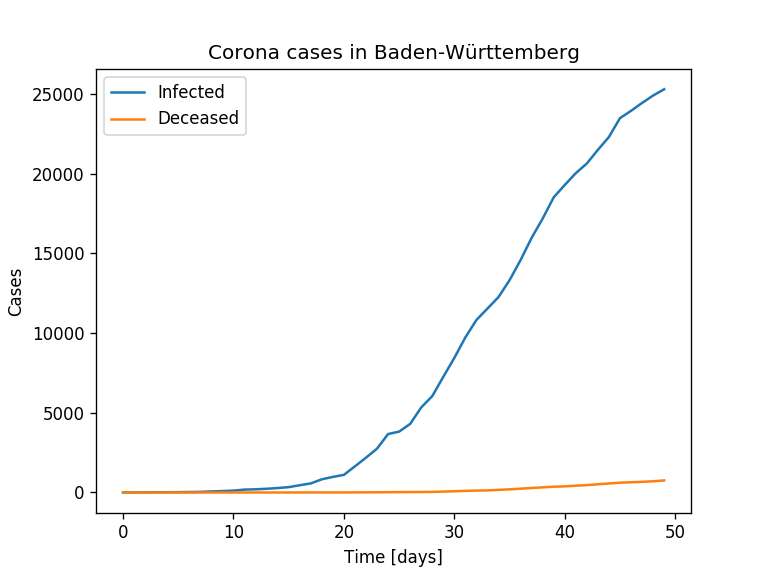

In [10]:
%matplotlib notebook
yI=np.flip(np.sum(ctyI,axis=0))
yT=np.insert(np.flip(np.sum(ctyT,axis=0)),0,np.zeros(16))
plt.plot(yI,label='Infected')
plt.plot(yT,label='Deceased')
plt.xlabel('Time [days]')
plt.ylabel('Cases')
plt.title('Corona cases in Baden-Württemberg')
plt.legend(loc='upper left')
plt.savefig('BWCases.png')

<IPython.core.display.Javascript object>


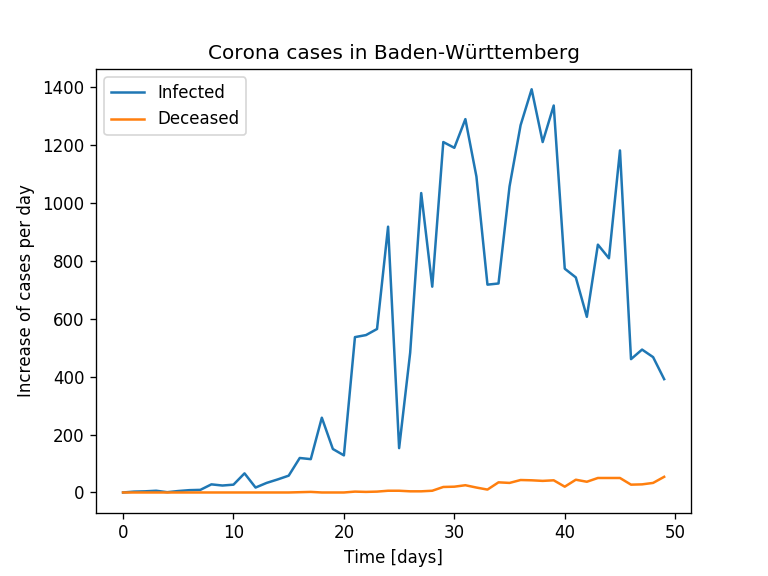

In [11]:
%matplotlib notebook
yItotal=np.flip(np.sum(ctyI,axis=0))
gesternI=yItotal-np.roll(yItotal,1)
gesternI[0]=0
yTtotal=np.insert(np.flip(np.sum(ctyT,axis=0)),0,np.zeros(16))
gesternT=yTtotal-np.roll(yTtotal,1)
gesternT[0]=0
plt.plot(gesternI,label='Infected')
plt.plot(gesternT,label='Deceased')
plt.xlabel('Time [days]')
plt.ylabel('Increase of cases per day')
plt.title('Corona cases in Baden-Württemberg')
plt.legend(loc='upper left')
plt.savefig('DeltaBWCases.png')

In [ ]:
yItotal=np.sum(ctyI,axis=0)
yTtotal=np.sum(ctyT,axis=0)